# BLOC 5 - GET AROUND - DATA ANALYSIS

##### Coralie GUILLOTTE - DSMFT-paris-20

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

c:\Users\laveg\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install openpyxl -q
import openpyxl

In [4]:
df_delay_analysis = pd.read_excel("./DASHBOARD/get_around_delay_analysis.xlsx")
df_delay_analysis.head(30)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [5]:
df_delay_analysis['state'].value_counts()

ended       18045
canceled     3265
Name: state, dtype: int64

In [6]:
#df_delay_analysis=df_delay_analysis.dropna(subset=['delay_at_checkout_in_minutes'])
df_delay_analysis2 = df_delay_analysis[(df_delay_analysis['state'] == 'canceled') | df_delay_analysis['delay_at_checkout_in_minutes'].notna()]

In [7]:
df_delay_analysis2['state'].value_counts()

ended       16345
canceled     3265
Name: state, dtype: int64

In [8]:
df_delay_analysis = df_delay_analysis.drop(df_delay_analysis[df_delay_analysis.delay_at_checkout_in_minutes>1440].index)


In [9]:
df_delay_analysis

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [10]:
mask5 = df_delay_analysis['state']=="ended"
df_ended = df_delay_analysis[mask5]
df_ended


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [11]:
mask6 = df_ended['delay_at_checkout_in_minutes']<=0
df_ended[mask6]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
15,518282,364160,connect,ended,-81.0,NaN,NaN
...,...,...,...,...,...,...,...
21279,568725,403265,connect,ended,-159.0,NaN,NaN
21285,569415,408598,mobile,ended,-74.0,NaN,NaN
21304,573322,376491,connect,ended,-66.0,NaN,NaN
21306,573790,341965,mobile,ended,-337.0,NaN,NaN


In [12]:
df_delay_analysis.shape

(21122, 7)

In [13]:
df_delay_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21122 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21122 non-null  int64  
 1   car_id                                      21122 non-null  int64  
 2   checkin_type                                21122 non-null  object 
 3   state                                       21122 non-null  object 
 4   delay_at_checkout_in_minutes                16158 non-null  float64
 5   previous_ended_rental_id                    1827 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1827 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.3+ MB


In [14]:
((df_delay_analysis.isnull().sum())/(df_delay_analysis.shape[0]))*100

rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.501562
previous_ended_rental_id                      91.350251
time_delta_with_previous_rental_in_minutes    91.350251
dtype: float64

In [15]:
df_delay_analysis.describe(include= "all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21122.000000,21122.000000,21122,21122,16158.000000,1827.000000,1827.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,16818,17857,NaN,NaN,NaN
mean,549713.161964,350051.838983,NaN,NaN,11.866444,550132.634921,279.408867
std,13868.068350,58129.975236,NaN,NaN,358.382387,13214.358360,254.505471
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540618.250000,317639.000000,NaN,NaN,-37.000000,540885.500000,60.000000
50%,550353.500000,368704.000000,NaN,NaN,8.000000,550583.000000,180.000000
75%,560468.500000,394869.000000,NaN,NaN,64.000000,560843.500000,540.000000


In [8]:
#Distribution of state in dataset 
px.pie(df_delay_analysis,names='state',title='Proportion of state type',hole=0.33)

AttributeError: module 'plotly.express' has no attribute 'pie'

In [80]:
#Distribution of checking type in dataset 
px.pie(df_delay_analysis,names='checkin_type',title='Proportion of checking',hole=0.33)

AttributeError: module 'plotly.express' has no attribute 'pie'

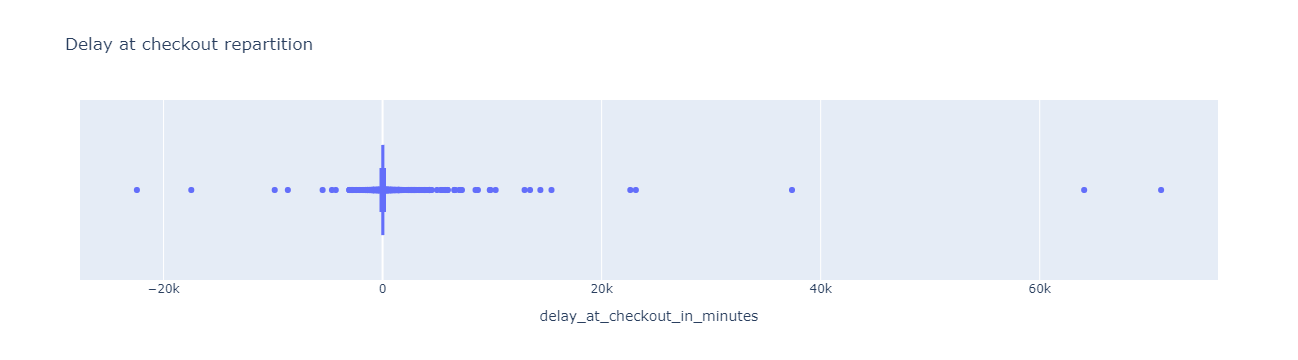

In [40]:
fig = px.box(df_delay_analysis, x='delay_at_checkout_in_minutes', title='Delay at checkout repartition')
fig.show()

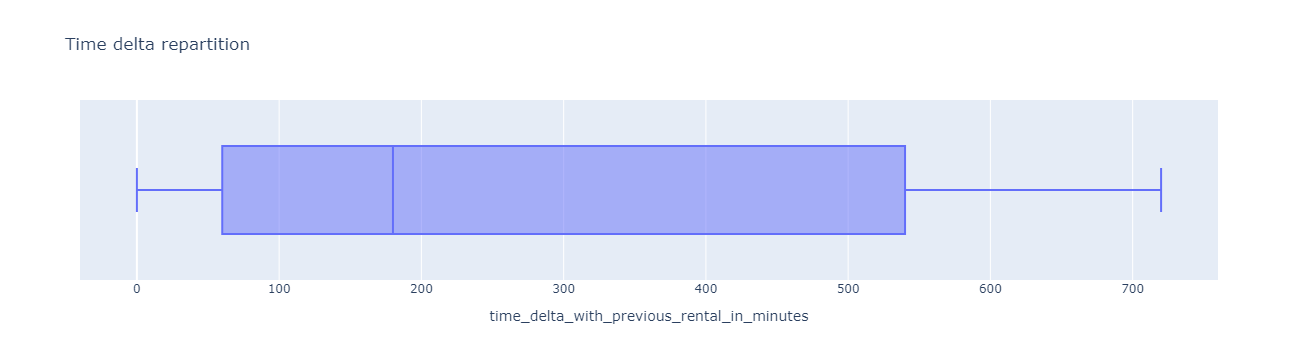

In [39]:
fig = px.box(df_delay_analysis, x="time_delta_with_previous_rental_in_minutes", title='Time delta repartition')
fig.show()

In [97]:
#We create a categorical veriable called "has_delay" that is equal to 1 if delay_at_checkout is positive and zero otherwise
df_delay_analysis['has_delay']=df_delay_analysis['delay_at_checkout_in_minutes'].fillna(0).apply(lambda x: 1 if x > 0 else 0)
df_delay_analysis.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,has_delay
1,507750,269550,mobile,ended,-81.0,NaN,NaN,0
2,508131,359049,connect,ended,70.0,NaN,NaN,1
5,511626,398802,mobile,ended,-203.0,NaN,NaN,0
6,511639,370585,connect,ended,-15.0,563782.0,570.0,0
7,512303,371242,mobile,ended,-44.0,NaN,NaN,0


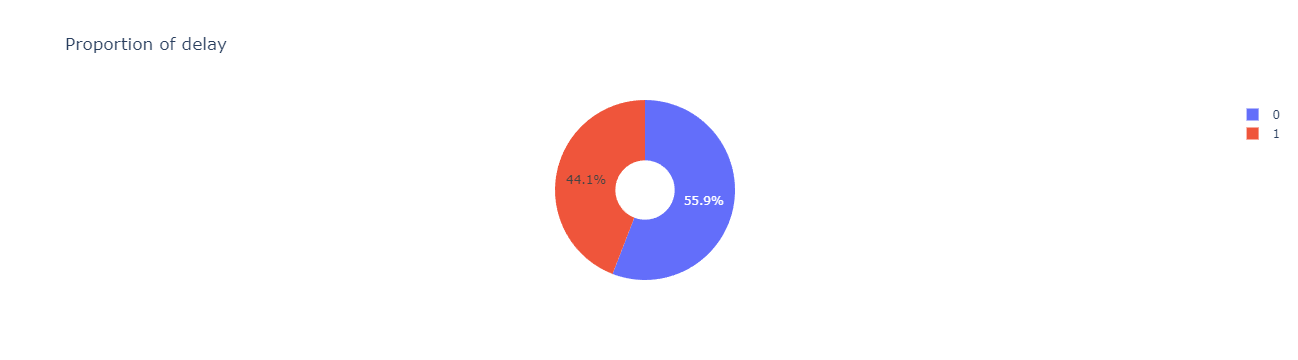

In [49]:
#Distribution of delayed rentals in dataset 
px.pie(df_delay_analysis,names='has_delay',title='Proportion of delay',hole=0.33)

In [57]:
mask = df_delay_analysis["has_delay"] ==1

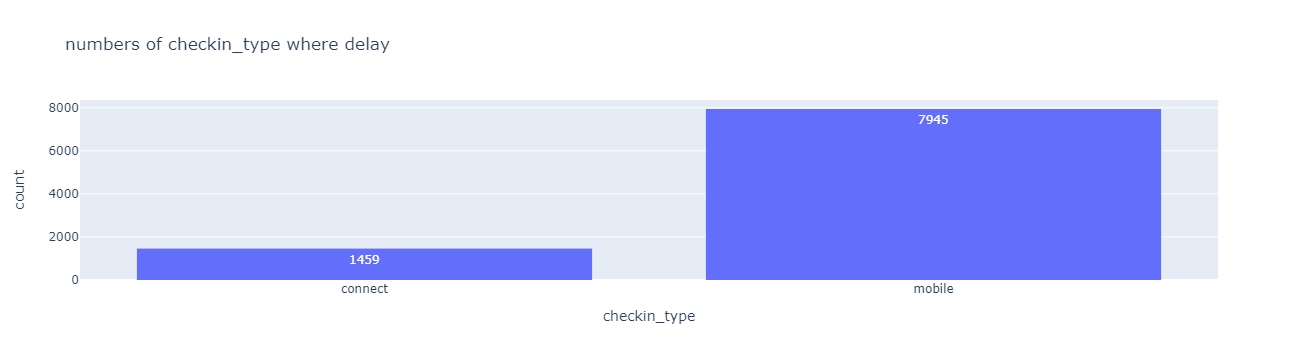

In [ ]:
fig = px.histogram(df_delay_analysis[mask], x="checkin_type", text_auto=True, title = "numbers of checkin_type where delay")
fig.show()

In [22]:
df_delay_analysis['has_delay']= df_delay_analysis['has_delay'].astype(str)

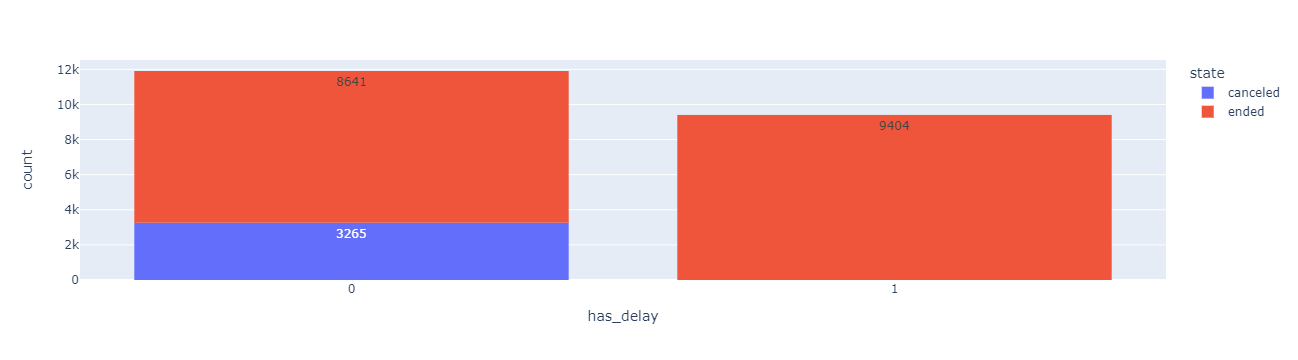

In [64]:
#plotting state histogram here 
fig = px.histogram(df_delay_analysis, x="has_delay", color="state", text_auto=True)
fig.show()

In [98]:
consecutive_rental_data = pd.merge(df_delay_analysis, df_delay_analysis, how='inner', left_on = 'previous_ended_rental_id', right_on = 'rental_id')

In [99]:
consecutive_rental_data

,rental_id_x,car_id_x,checkin_type_x,state_x,delay_at_checkout_in_minutes_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,has_delay_x,rental_id_y,car_id_y,checkin_type_y,state_y,delay_at_checkout_in_minutes_y,previous_ended_rental_id_y,time_delta_with_previous_rental_in_minutes_y,has_delay_y
0,511639,370585,connect,ended,-15.0,563782.0,570.0,0,563782,370585,connect,ended,136.0,NaN,NaN,1
1,519491,312389,mobile,ended,58.0,545639.0,420.0,1,545639,312389,mobile,ended,140.0,NaN,NaN,1
2,528808,181625,connect,ended,-76.0,557404.0,330.0,0,557404,181625,connect,ended,-352.0,554077.0,120.0,0
3,533670,320824,connect,ended,-6.0,556563.0,630.0,0,556563,320824,connect,ended,23.0,NaN,NaN,1
4,534827,404169,mobile,ended,-7.0,531158.0,90.0,0,531158,404169,mobile,ended,29.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,571823,353425,connect,ended,-276.0,569556.0,240.0,0,569556,353425,connect,ended,-177.0,NaN,NaN,0
1454,573274,298117,connect,ended,-7.0,571227.0,210.0,0,571227,298117,connect,ended,-13.0,571310.0,600.0,0
1455,567741,294059,mobile,ended,111.0,567708.0,120.0,1,567708,294059,mobile,ended,283.0,NaN,NaN,1
1456,568523,297973,mobile,ended,12.0,567121.0,240.0,1,567121,297973,mobile,ended,-275.0,NaN,NaN,0


In [64]:
consecutive_rental_data.drop(
    [
        "rental_id_y", 
        "car_id_y", 
        "state_y",
        "time_delta_with_previous_rental_in_minutes_y",
        "previous_ended_rental_id_y",
    ], 
    axis=1,
    inplace=True
)

In [101]:
consecutive_rental_data['state_x'].value_counts()

ended    1458
Name: state_x, dtype: int64

In [57]:
#consecutive_rental_data = consecutive_rental_data[~consecutive_rental_data["delay_at_checkout_in_minutes_x"].isnull()]
#consecutive_rental_data.reset_index(drop=True, inplace=True)

In [66]:
consecutive_rental_data

,rental_id_x,car_id_x,checkin_type_x,state_x,delay_at_checkout_in_minutes_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,has_delay_x,checkin_type_y,delay_at_checkout_in_minutes_y,has_delay_y
0,511639,370585,connect,ended,-15.0,563782.0,570.0,0,connect,136.0,1
1,519491,312389,mobile,ended,58.0,545639.0,420.0,1,mobile,140.0,1
2,521156,392479,mobile,ended,NaN,537298.0,0.0,0,mobile,NaN,0
3,525044,349751,mobile,ended,NaN,510607.0,60.0,0,mobile,-113.0,0
4,528808,181625,connect,ended,-76.0,557404.0,330.0,0,connect,-352.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1836,567741,294059,mobile,ended,111.0,567708.0,120.0,1,mobile,283.0,1
1837,568241,396409,mobile,canceled,NaN,566136.0,570.0,0,mobile,16.0,1
1838,568523,297973,mobile,ended,12.0,567121.0,240.0,1,mobile,-275.0,0
1839,569717,377312,mobile,ended,230.0,545045.0,90.0,1,mobile,22.0,1


In [82]:
((consecutive_rental_data.isnull().sum())/(consecutive_rental_data.shape[0]))*100

rental_id_x                                      0.000000
car_id_x                                         0.000000
checkin_type_x                                   0.000000
state_x                                          0.000000
delay_at_checkout_in_minutes_x                  17.707768
previous_ended_rental_id_x                       0.000000
time_delta_with_previous_rental_in_minutes_x     0.000000
has_delay_x                                      0.000000
checkin_type_y                                   0.000000
delay_at_checkout_in_minutes_y                   6.083650
has_delay_y                                      0.000000
delayed_checkin_in_minutes                       6.083650
dtype: float64

In [67]:
mask2 = consecutive_rental_data["has_delay_y"]=="1"
consecutive_rental_data_with_late_x = consecutive_rental_data[mask2]
consecutive_rental_data_with_late_x

,rental_id_x,car_id_x,checkin_type_x,state_x,delay_at_checkout_in_minutes_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,has_delay_x,checkin_type_y,delay_at_checkout_in_minutes_y,has_delay_y
0,511639,370585,connect,ended,-15.0,563782.0,570.0,0,connect,136.0,1
1,519491,312389,mobile,ended,58.0,545639.0,420.0,1,mobile,140.0,1
5,533670,320824,connect,ended,-6.0,556563.0,630.0,0,connect,23.0,1
6,534827,404169,mobile,ended,-7.0,531158.0,90.0,0,mobile,29.0,1
7,535611,397814,mobile,ended,68.0,535512.0,300.0,1,mobile,44.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1829,568153,312716,mobile,ended,-166.0,541645.0,120.0,0,mobile,39.0,1
1830,568325,354026,mobile,ended,3.0,567791.0,90.0,1,mobile,18.0,1
1836,567741,294059,mobile,ended,111.0,567708.0,120.0,1,mobile,283.0,1
1837,568241,396409,mobile,canceled,NaN,566136.0,570.0,0,mobile,16.0,1


In [68]:
consecutive_rental_data['delayed_checkin_in_minutes']=[
    consecutive_rental_data.delay_at_checkout_in_minutes_y[i]-consecutive_rental_data.time_delta_with_previous_rental_in_minutes_x[i] for i in range(len(consecutive_rental_data))
    ]

In [69]:
consecutive_rental_data['delayed_checkin_in_minutes']=[
    consecutive_rental_data.time_delta_with_previous_rental_in_minutes_x[i]- consecutive_rental_data.delay_at_checkout_in_minutes_y[i] for i in range(len(consecutive_rental_data))
    ]

In [70]:
consecutive_rental_data

,rental_id_x,car_id_x,checkin_type_x,state_x,delay_at_checkout_in_minutes_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,has_delay_x,checkin_type_y,delay_at_checkout_in_minutes_y,has_delay_y,delayed_checkin_in_minutes
0,511639,370585,connect,ended,-15.0,563782.0,570.0,0,connect,136.0,1,434.0
1,519491,312389,mobile,ended,58.0,545639.0,420.0,1,mobile,140.0,1,280.0
2,521156,392479,mobile,ended,NaN,537298.0,0.0,0,mobile,NaN,0,NaN
3,525044,349751,mobile,ended,NaN,510607.0,60.0,0,mobile,-113.0,0,173.0
4,528808,181625,connect,ended,-76.0,557404.0,330.0,0,connect,-352.0,0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1836,567741,294059,mobile,ended,111.0,567708.0,120.0,1,mobile,283.0,1,-163.0
1837,568241,396409,mobile,canceled,NaN,566136.0,570.0,0,mobile,16.0,1,554.0
1838,568523,297973,mobile,ended,12.0,567121.0,240.0,1,mobile,-275.0,0,515.0
1839,569717,377312,mobile,ended,230.0,545045.0,90.0,1,mobile,22.0,1,68.0


In [71]:
mask4 = consecutive_rental_data["delayed_checkin_in_minutes"]<0

In [72]:
consecutive_rental_data[mask4]

,rental_id_x,car_id_x,checkin_type_x,state_x,delay_at_checkout_in_minutes_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,has_delay_x,checkin_type_y,delay_at_checkout_in_minutes_y,has_delay_y,delayed_checkin_in_minutes
11,540479,374684,mobile,ended,12.0,539751.0,0.0,1,mobile,3.0,1,-3.0
12,541862,382364,mobile,ended,125.0,540607.0,0.0,1,mobile,1.0,1,-1.0
40,559781,408776,mobile,ended,44.0,540868.0,0.0,1,mobile,26.0,1,-26.0
68,574568,301512,mobile,ended,110.0,572909.0,0.0,1,mobile,13.0,1,-13.0
72,535519,353425,connect,ended,-166.0,533413.0,0.0,0,connect,4.0,1,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1806,561206,312603,connect,ended,10.0,554958.0,30.0,1,connect,183.0,1,-153.0
1808,561476,410402,mobile,ended,11.0,550186.0,0.0,1,mobile,21.0,1,-21.0
1814,560740,383344,connect,ended,17.0,534678.0,60.0,1,connect,164.0,1,-104.0
1824,566008,378689,mobile,canceled,NaN,564756.0,0.0,0,mobile,39.0,1,-39.0


In [73]:
cancelled_rentals = consecutive_rental_data[
    (consecutive_rental_data["state_x"]=="canceled")
    ]

In [74]:
cancelled_rentals

,rental_id_x,car_id_x,checkin_type_x,state_x,delay_at_checkout_in_minutes_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,has_delay_x,checkin_type_y,delay_at_checkout_in_minutes_y,has_delay_y,delayed_checkin_in_minutes
17,543768,374169,connect,canceled,NaN,543010.0,210.0,0,connect,42.0,1,168.0
19,546160,352528,connect,canceled,NaN,546578.0,630.0,0,connect,-536.0,0,1166.0
20,546387,352528,connect,canceled,NaN,546578.0,600.0,0,connect,-536.0,0,1136.0
35,556014,245154,connect,canceled,NaN,566170.0,210.0,0,connect,-2.0,0,212.0
48,564627,341431,mobile,canceled,NaN,552005.0,150.0,0,mobile,-88.0,0,238.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1824,566008,378689,mobile,canceled,NaN,564756.0,0.0,0,mobile,39.0,1,-39.0
1826,566228,390871,connect,canceled,NaN,568465.0,60.0,0,connect,NaN,0,NaN
1827,567305,405564,mobile,canceled,NaN,552222.0,0.0,0,mobile,NaN,0,NaN
1833,569706,245154,connect,canceled,NaN,558088.0,660.0,0,connect,-40.0,0,700.0


In [26]:
consecutive_rental_data_with_delay_x

,rental_id_x,car_id_x,checkin_type_x,state_x,delay_at_checkout_in_minutes_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,has_delay_x,rental_id_y,car_id_y,checkin_type_y,state_y,delay_at_checkout_in_minutes_y,previous_ended_rental_id_y,time_delta_with_previous_rental_in_minutes_y,has_delay_y
0,511639,370585,connect,ended,-15.0,563782.0,570.0,0,563782,370585,connect,ended,136.0,NaN,NaN,1
1,519491,312389,mobile,ended,58.0,545639.0,420.0,1,545639,312389,mobile,ended,140.0,NaN,NaN,1
5,533670,320824,connect,ended,-6.0,556563.0,630.0,0,556563,320824,connect,ended,23.0,NaN,NaN,1
6,534827,404169,mobile,ended,-7.0,531158.0,90.0,0,531158,404169,mobile,ended,29.0,NaN,NaN,1
7,535611,397814,mobile,ended,68.0,535512.0,300.0,1,535512,397814,mobile,ended,44.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,568153,312716,mobile,ended,-166.0,541645.0,120.0,0,541645,312716,mobile,ended,39.0,NaN,NaN,1
1830,568325,354026,mobile,ended,3.0,567791.0,90.0,1,567791,354026,mobile,ended,18.0,NaN,NaN,1
1836,567741,294059,mobile,ended,111.0,567708.0,120.0,1,567708,294059,mobile,ended,283.0,NaN,NaN,1
1837,568241,396409,mobile,canceled,NaN,566136.0,570.0,0,566136,396409,mobile,ended,16.0,NaN,NaN,1


In [ ]:
consecutive_rental_data.drop(
    [
        "delay_at_checkout_in_minutes_x",
        "rental_id_y", 
        "car_id_y", 
        "state_y",
        "time_delta_with_previous_rental_in_minutes_y",
        "previous_ended_rental_id_y",
        "checkout_status_x"
    ], 
    axis=1,
    inplace=True

In [27]:
"proportion of delay for consecutive rental"
px.pie(consecutive_rental_data_with_delay_x,names='has_delay_x',title='Proportion of delay y',hole=0.33)

AttributeError: module 'plotly.express' has no attribute 'pie'

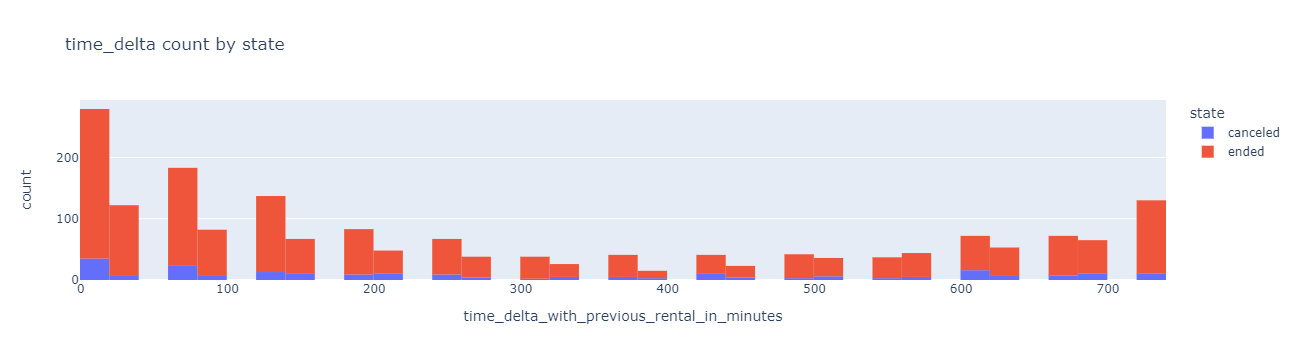

In [126]:
#distirbution of time_delta by state  --> some rentals were cancelled even if the time delta between two consecutives entals is big enough 
fig = px.histogram(df_delay_analysis, x="time_delta_with_previous_rental_in_minutes", color="state",title="time_delta count by state")
fig.show()

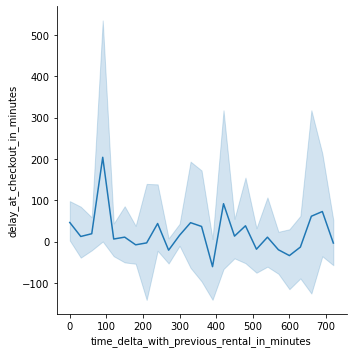

In [127]:
sns.relplot(x=df_delay_analysis["time_delta_with_previous_rental_in_minutes"], y=df_delay_analysis["delay_at_checkout_in_minutes"], kind="line")